# ECE239AS Project

#### Load the dataset

In [2]:
from useful.utils import *
from useful.CNN_RNN_v1 import *
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

/Users/shuangyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)


# CNN+ GRU

In [3]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    

def test(test_loader=val_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target).long()
        output = model(data)
        test_loss += criteria(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

def main_train(epoches = 10):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    stats['test']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))       
        stats['test'].append(test(test_loader, mode = 'val'))

    

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])
    stats['test'] = np.array(stats['test'])
    print("Best test acc is :")
    print(np.amax(stats['test'][:,1]))

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

### subject 1

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/187 (0%)]	Loss: 1.393840
Train Epoch: 0 [100/187 (50%)]	Loss: 1.373409
train loss: 1.3864, Accuracy: 46/187 (25%)
validation loss: 1.3857, Accuracy: 13/50 (26%)

validation loss: 1.3854, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/187 (0%)]	Loss: 1.390962
Train Epoch: 1 [100/187 (50%)]	Loss: 1.391190
train loss: 1.3755, Accuracy: 67/187 (36%)
validation loss: 1.3758, Accuracy: 18/50 (36%)

validation loss: 1.3790, Accuracy: 16/50 (32%)

Train Epoch: 2 [0/187 (0%)]	Loss: 1.393725
Train Epoch: 2 [100/187 (50%)]	Loss: 1.367506
train loss: 1.3644, Accuracy: 74/187 (40%)
validation loss: 1.3697, Accuracy: 17/50 (34%)

validation loss: 1.3751, Accuracy: 10/50 (20%)

Train Epoch: 3 [0/187 (0%)]	Loss: 1.364939
Tr

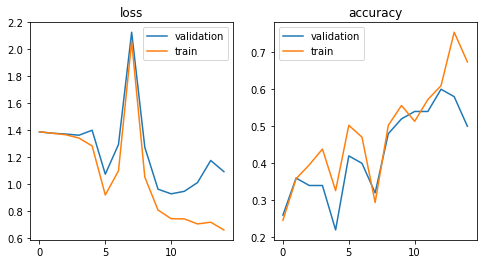

In [3]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 2

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.378667
Train Epoch: 0 [100/186 (50%)]	Loss: 1.365815
train loss: 1.3855, Accuracy: 47/186 (25%)
validation loss: 1.3870, Accuracy: 12/50 (24%)

validation loss: 1.3874, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.377726
Train Epoch: 1 [100/186 (50%)]	Loss: 1.396327
train loss: 1.3777, Accuracy: 66/186 (35%)
validation loss: 1.3826, Accuracy: 15/50 (30%)

validation loss: 1.3856, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.385489
Train Epoch: 2 [100/186 (50%)]	Loss: 1.389925
train loss: 1.3637, Accuracy: 89/186 (48%)
validation loss: 1.3885, Accuracy: 12/50 (24%)

validation loss: 1.3863, Accuracy: 12/50 (24%)

Train E

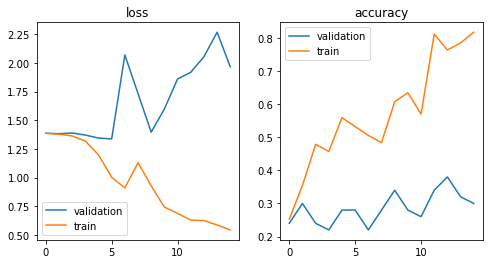

In [4]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A02T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 3

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.407683
Train Epoch: 0 [100/186 (50%)]	Loss: 1.380987
train loss: 1.3855, Accuracy: 47/186 (25%)
validation loss: 1.3872, Accuracy: 12/50 (24%)

validation loss: 1.3859, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.385440
Train Epoch: 1 [100/186 (50%)]	Loss: 1.410430
train loss: 1.3779, Accuracy: 54/186 (29%)
validation loss: 1.3886, Accuracy: 11/50 (22%)

validation loss: 1.3838, Accuracy: 17/50 (34%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.400753
Train Epoch: 2 [100/186 (50%)]	Loss: 1.394089
train loss: 1.3711, Accuracy: 79/186 (42%)
validation loss: 1.3886, Accuracy: 12/50 (24%)

validation loss: 1.3844, Accuracy: 9/50 (18%)

Train Ep

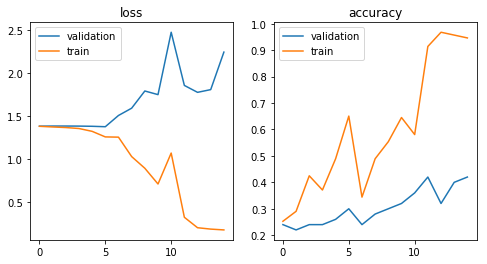

In [5]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A03T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject4

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
Train data shape:  (184, 22, 1000)
Train labels shape:  (184,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/184 (0%)]	Loss: 1.362250
Train Epoch: 0 [100/184 (50%)]	Loss: 1.423998
train loss: 1.3868, Accuracy: 46/184 (25%)
validation loss: 1.3881, Accuracy: 12/50 (24%)

validation loss: 1.3862, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/184 (0%)]	Loss: 1.393620
Train Epoch: 1 [100/184 (50%)]	Loss: 1.376822
train loss: 1.3810, Accuracy: 55/184 (30%)
validation loss: 1.3899, Accuracy: 12/50 (24%)

validation loss: 1.3840, Accuracy: 15/50 (30%)

Train Epoch: 2 [0/184 (0%)]	Loss: 1.389996
Train Epoch: 2 [100/184 (50%)]	Loss: 1.376552
train loss: 1.3754, Accuracy: 65/184 (35%)
validation loss: 1.3869, Accu

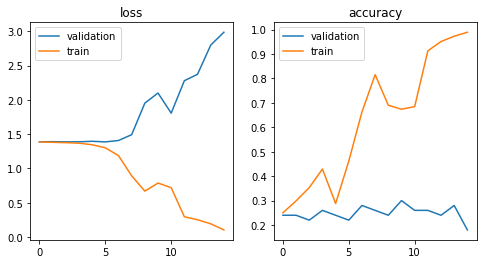

In [6]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A04T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject5

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.396955
Train Epoch: 0 [100/182 (50%)]	Loss: 1.364494
train loss: 1.3918, Accuracy: 57/182 (31%)
validation loss: 1.3961, Accuracy: 15/50 (30%)

validation loss: 1.3919, Accuracy: 17/50 (34%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.370263
Train Epoch: 1 [100/182 (50%)]	Loss: 1.412434
train loss: 1.3808, Accuracy: 55/182 (30%)
validation loss: 1.3862, Accuracy: 14/50 (28%)

validation loss: 1.3830, Accuracy: 16/50 (32%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.404677
Train Epoch: 2 [100/182 (50%)]	Loss: 1.382537
tr

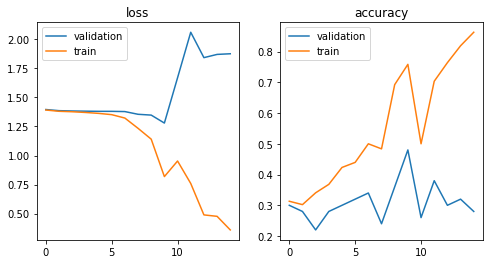

In [7]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A05T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 6

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
Train data shape:  (185, 22, 1000)
Train labels shape:  (185,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/185 (0%)]	Loss: 1.399315
Train Epoch: 0 [100/185 (50%)]	Loss: 1.433707
train loss: 1.3853, Accuracy: 46/185 (25%)
validation loss: 1.3858, Accuracy: 12/50 (24%)

validation loss: 1.3847, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/185 (0%)]	Loss: 1.390945
Train Epoch: 1 [100/185 (50%)]	Loss: 1.399744
train loss: 1.3775, Accuracy: 58/185 (31%)
validation loss: 1.3781, Accuracy: 14/50 (28%)

validation loss: 1.3797, Accuracy: 15/50 (30%)

Train Epoch: 2 [0/185 (0%)]	Loss: 1.360017
Train Epoch: 2 [100/185 (50%)]	Loss: 1.379048
train loss: 1.3695, Accuracy: 79/185 (43%)
validation loss: 1.3735, Accuracy: 18/50 (36%)

validation loss: 1.

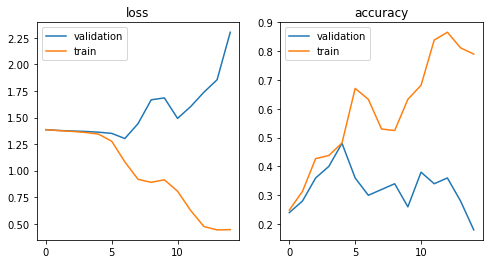

In [8]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A06T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 7

X_shape (288, 22, 1000)
y_shape (1, 1000)
Train data shape:  (188, 22, 1000)
Train labels shape:  (188,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/188 (0%)]	Loss: 1.379752
Train Epoch: 0 [100/188 (50%)]	Loss: 1.388801
train loss: 1.3859, Accuracy: 47/188 (25%)
validation loss: 1.3871, Accuracy: 12/50 (24%)

validation loss: 1.3853, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/188 (0%)]	Loss: 1.379260
Train Epoch: 1 [100/188 (50%)]	Loss: 1.358534
train loss: 1.3704, Accuracy: 77/188 (41%)
validation loss: 1.3794, Accuracy: 19/50 (38%)

validation loss: 1.3806, Accuracy: 13/50 (26%)

Train Epoch: 2 [0/188 (0%)]	Loss: 1.379844
Train Epoch: 2 [100/188 (50%)]	Loss: 1.384763
train loss: 1.3555, Accuracy: 93/188 (49%)
validation loss: 1.3709, Accuracy: 15/50 (30%)

validation loss: 1.3740, Accuracy: 11/50 (22%)

Train Epoch: 3 [0/188 (0%)]	Loss: 1.392636
Train Epoch: 3 [100/188 (50%)]	Loss: 1

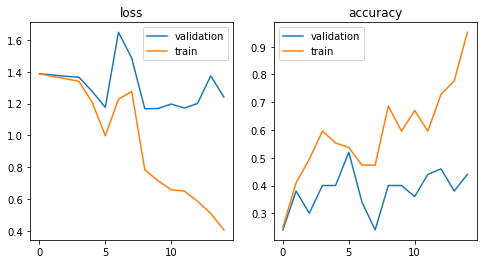

In [9]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A07T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 8

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.423920
Train Epoch: 0 [100/182 (50%)]	Loss: 1.385382
train loss: 1.3810, Accuracy: 46/182 (25%)
validation loss: 1.3853, Accuracy: 11/50 (22%)

validation loss: 1.3865, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.373110
Train Epoch: 1 [100/182 (50%)]	Loss: 1.375097
train loss: 1.3472, Accuracy: 77/182 (42%)
validation loss: 1.3543, Accuracy: 19/50 (38%)

validation loss: 1.3742, Accuracy: 14/50 (28%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.366629
Train Epoch: 2 [100/182 (50%)]	Loss: 1.318612


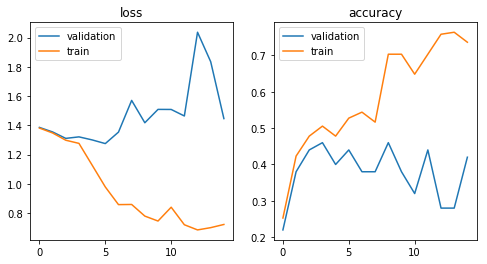

In [10]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A08T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 09

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 22,and be deleted
nan exists on row 61,and be deleted
nan exists on row 92,and be deleted
nan exists on row 93,and be deleted
nan exists on row 159,and be deleted
nan exists on row 202,and be deleted
nan exists on row 204,and be deleted
nan exists on row 218,and be deleted
nan exists on row 239,and be deleted
nan exists on row 250,and be deleted
Train data shape:  (178, 22, 1000)
Train labels shape:  (178,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/178 (0%)]	Loss: 1.420500
Train Epoch: 0 [100/178 (56%)]	Loss: 1.393024
train loss: 1.3853, Accuracy: 45/178 (25%)
validation loss: 1.3879, Accuracy: 12/50 (24%)

validation loss: 1.3886, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/178 (0%)]	Loss: 1.351278
Train Epoch: 1 [100/178 (56%)]	Loss: 1.328918
train loss: 1.3511, Accuracy: 75/178 (42%)
validation loss: 1.3647, Accuracy: 18/5

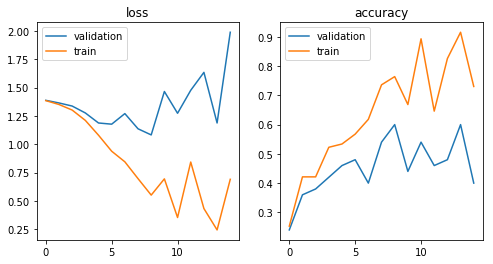

In [11]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A09T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### wholeset

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 8 [1500/1838 (81%)]	Loss: 1.262921
Train Epoch: 8 [1650/1838 (89%)]	Loss: 1.404273
Train Epoch: 8 [1800/1838 (97%)]	Loss: 1.101336
train loss: 1.0895, Accuracy: 925/1838 (50%)
validation loss: 1.1859, Accuracy: 120/270 (44%)

validation loss: 1.1910, Accuracy: 199/450 (44%)

Train Epoch: 9 [0/1838 (0%)]	Loss: 1.046157
Train Epoch: 9 [150/1838 (8%)]	Loss: 1.165807
Train Epoch: 9 [300/1838 (16%)]	Loss: 1.033453
Train Epoch: 9 [450/1838 (24%)]	Loss: 0.997742
Train Epoch: 9 [600/1838 (32%)]	Loss: 1.090182
Train Epoch: 9 [750/1838 (40%)]	Loss: 1.285546
Train Epoch: 9 [900/1838 (48%)]	Loss: 1.133095
Train Epoch: 9 [1050/1838 (56%)]	Loss: 0.958288
Train Epoch: 9 [1200/1838 (65%)]	Loss: 1.166532
Train Epoch: 9 [1350/1838 (73%)]	Loss: 0.929624
Train Epoch: 9 [1500/1838 (81%)]	Loss: 1.096796
Train Epoch: 9 [1650/1838 (89%)]	Loss: 1.145192
Train Epoch: 9 [1800/1838 (97%)]	Loss: 1.044945
train loss: 1.0927, Accuracy: 926/1838 (50%)
validation loss: 1.2590, Accuracy: 118/270 (44%)

val

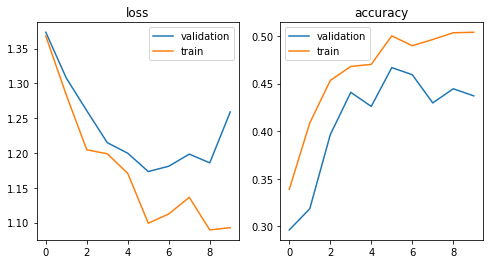

In [4]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = RNN_GRU()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')

In [5]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = RNN_GRU()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

KeyboardInterrupt: 